   换设备次数  支付失败次数  换IP次数  换IP国次数   交易金额  欺诈标签
0      0      11      3       5  28836     1
1      5       6      1       4  21966     1
2      6       2      0       0  18199     1
3      5       8      2       2  24803     1
4      7      10      5       0  26277     1
- 逻辑回归调优 {'C': 1.0, 'max_iter': 1000}
- 决策树调优 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}
逻辑回归准确率 0.785
逻辑回归精确率 0.8032786885245902
决策树准确率 0.91
决策树精确率 0.984375


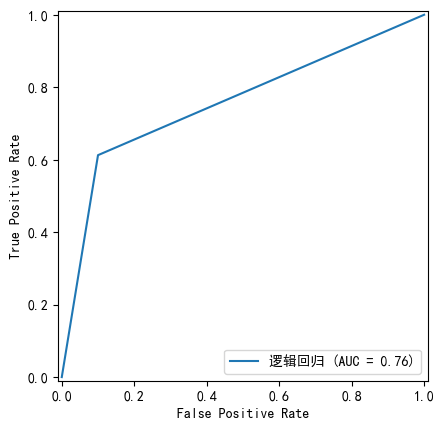

In [26]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# 题目一、金融欺诈。
# 信用卡盗刷一般发生在持卡人信息被不法分子窃取后复制卡片进行消费或信用卡被他人冒领后激活消费的情况。一旦发生信用卡盗刷，持卡人和银行都会蒙受一定的经济损失。因此，通过大数据搭建金融反欺诈模型对银行来说尤为重要。
# 1、读取数据：信用卡交易数据.xlsx查看前5行(3分)、
import pandas as pd
a1=pd.read_excel("E:///python代码/lx-yk/data-yk/yk3/信用卡交易数据.xlsx")
print(a1.head(5))
a1.isnull().sum()
a1.fillna(0,inplace=True)
a1.drop_duplicates(inplace=True)
a1
#预处理
x= a1.drop('欺诈标签',axis=1)
y=a1['欺诈标签']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=30)
# 
# # 3、自主选择2种算法对样本进行模型训练(10分)
# ---------------------------------------------- 逻辑回归
from sklearn.linear_model import LogisticRegression
lj = LogisticRegression(max_iter=1000)#如果不写'max_iter'就使用默认值100
lj.fit(x_train, y_train)
lj_yc=lj.predict(x_test)
# ---------------------------------------------- 决策树
trees=DecisionTreeClassifier(min_samples_leaf=2,min_samples_split=3)
trees.fit(x_train, y_train)
trees_yc=trees.predict(x_test)


# # 4、对选择的2个算法进行参数调优(10分)
lj_ty={'C':[1.0,10.0,20.0],'max_iter':[1000,2000,3000]}
ty1=GridSearchCV(estimator=lj,param_grid=lj_ty)
ty1.fit(x_train, y_train)

print('- 逻辑回归调优',ty1.best_params_)

trees_ty={'min_samples_leaf':[2,5,7],'min_samples_split':[3,4,5],'max_depth':[10,20,30]}
ty2=GridSearchCV(estimator=trees,param_grid=trees_ty)
ty2.fit(x_train, y_train)

print('- 决策树调优',ty2.best_params_)
# 5、自主选择至少2种指标进行模型评估(6分)
ty1_yc=ty1.predict(x_test)
print("逻辑回归准确率",accuracy_score(y_test,ty1_yc))
print("逻辑回归精确率",precision_score(y_test,ty1_yc))


ty2_yc=ty2.predict(x_test)
print("决策树准确率",accuracy_score(y_test,ty2_yc))
print("决策树精确率",precision_score(y_test,ty2_yc))
# 6、绘制PR曲线 与ROC曲线来评估模型预测的效果(6分)
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = True
mpl.rcParams['font.sans-serif'] = 'Simhei'
# ty1.best_params_
# ty2.best_params_
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, ty1_yc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='逻辑回归')
display.plot()
plt.show()





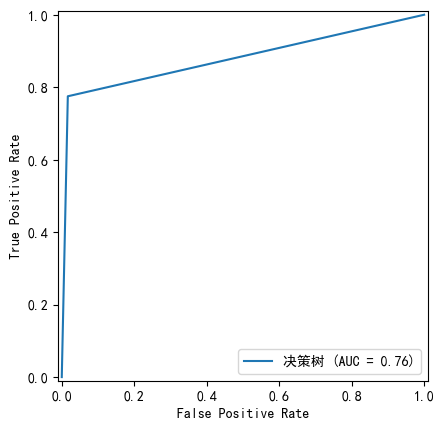

In [20]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, ty2_yc)
roc_auc1 = metrics.auc(fpr1, tpr1)
display1 = metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc,estimator_name='决策树')
display1.plot()
plt.show()

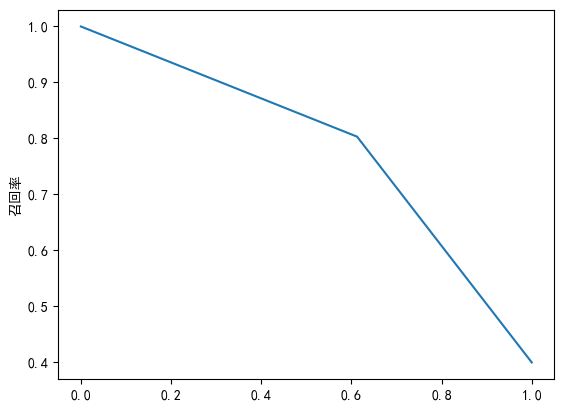

In [22]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds2 = precision_recall_curve(y_test, ty1_yc)
plt.plot(recall,precision)
plt.ylabel('精确度 ')
plt.ylabel('召回率')
plt.show()


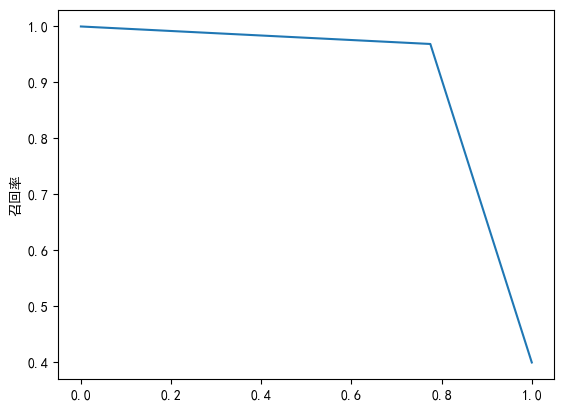

In [23]:
precision1, recall1, thresholds3 = precision_recall_curve(y_test, ty2_yc)
plt.plot(recall1,precision1)
plt.ylabel('精确度 ')
plt.ylabel('召回率')
plt.show()

In [27]:
# 7、输出特征重要性及预测结果(5分)
print("# 7、特征重要性",trees.feature_importances_)
print("# 逻辑回归预测结果(5分)",lj_yc)
print("# 决策树预测结果(5分)",trees_yc)


# 7、特征重要性 [0.33307283 0.18685416 0.07957816 0.2511108  0.14938406]
# 逻辑回归预测结果(5分) [0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
# 决策树预测结果(5分) [0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]
